In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sqlalchemy import create_engine
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore') 
import psycopg2

creating database connction|

In [13]:
conn=psycopg2.connect(
    host="localhost",
    database="inventory_db2",
    user="postgres",
    password="Layappa123@",
    port="5432"
)

fetching vendor summary data

In [14]:
df=pd.read_sql("select * from vendor_sales_summary",conn)

In [15]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Grossprofit,profitMargin,Stock_turnover,SalesTO_PurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,33.864673,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,26.682999,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,32.759433,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,37.249347,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,39.689707,0.983556,1.396897




### **Exploratory Data Analysis**

* Previously, we examined the various tables in the database to identify key variables, understand their relationships,
and determine which ones should be included in the final analysis.

* In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. 
This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


In [16]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,18793.783627,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


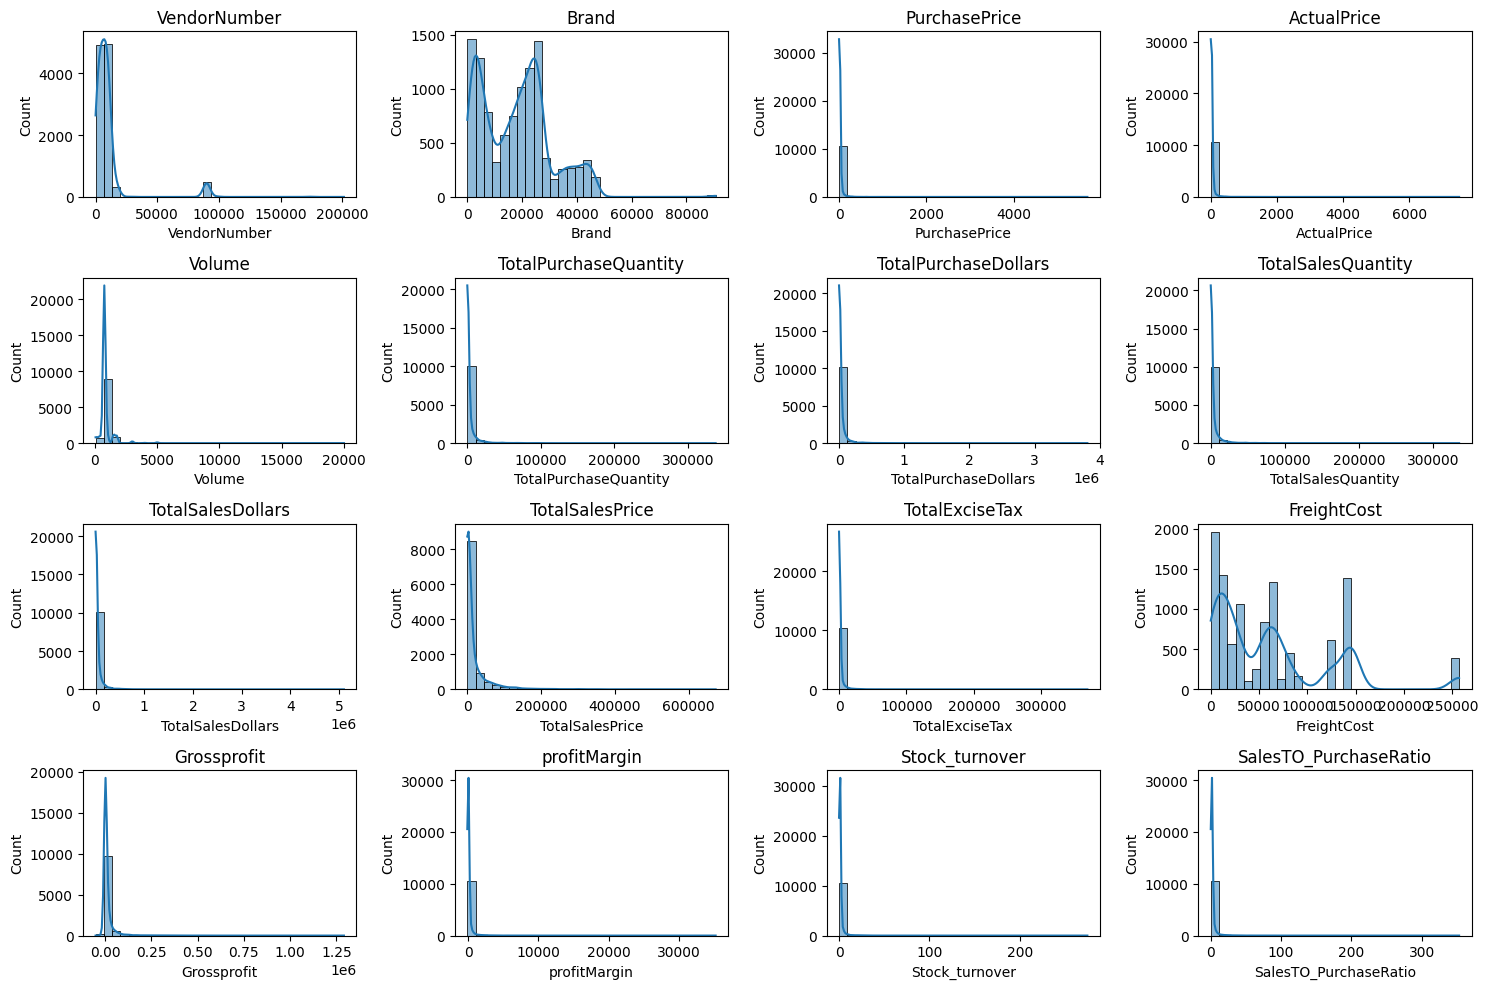

In [17]:
#distributoion plots for numerical  columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

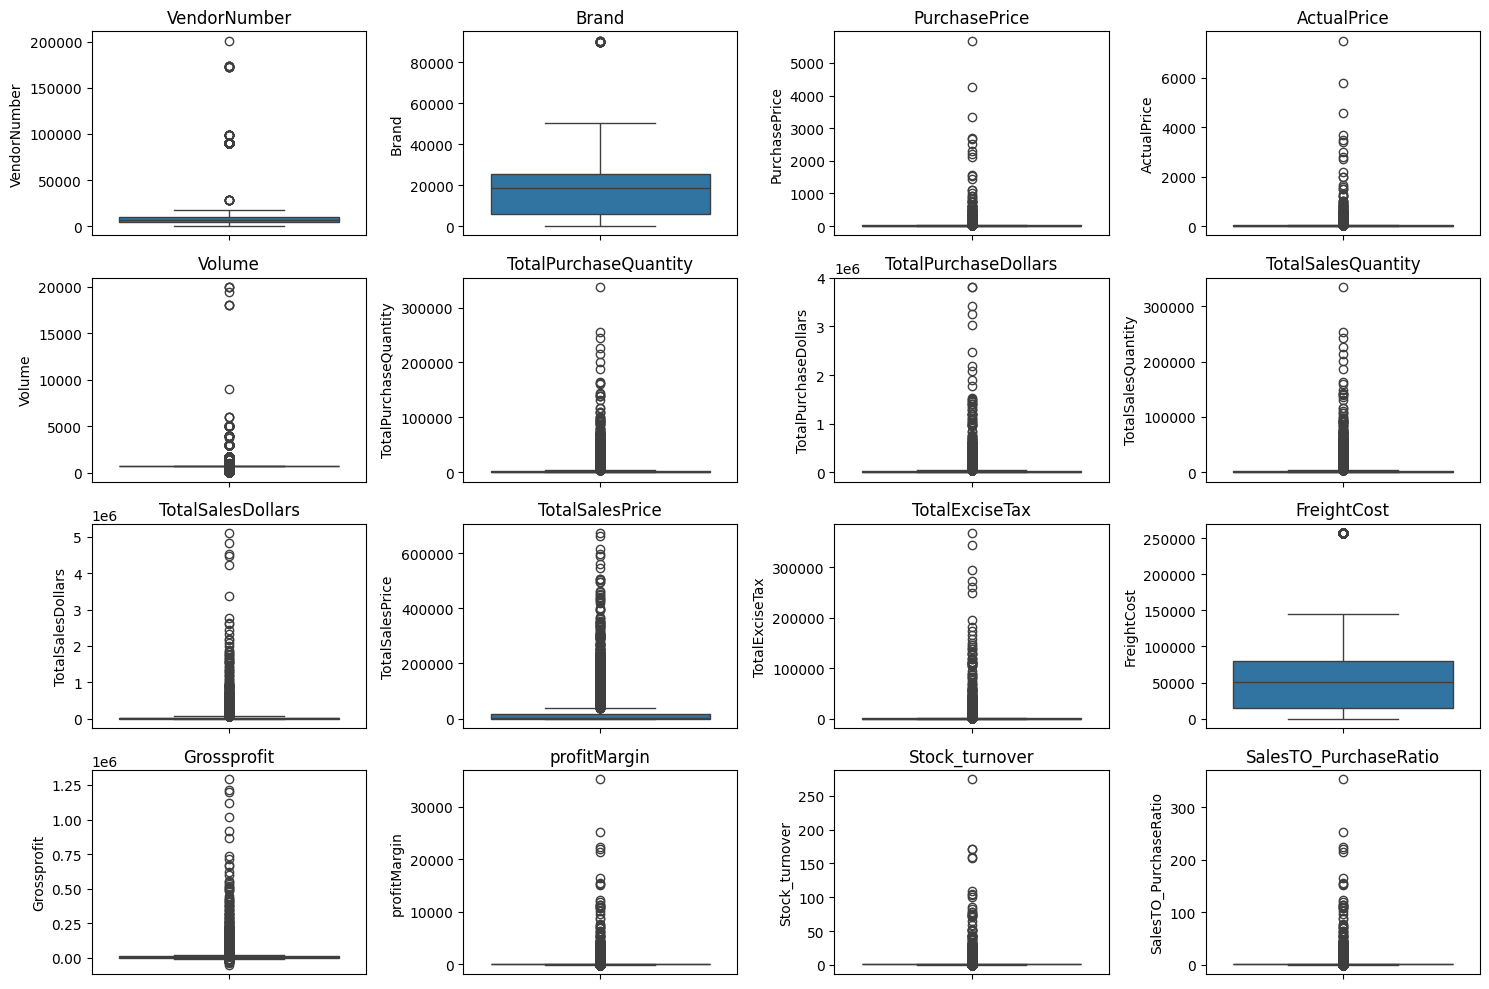

In [18]:
#distributoion plots for numerical  columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


---

## **Summary Statistics Insights**

### **Negative & Zero Values:**

* **Gross Profit:** Minimum value is **-52,002.78**, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

* **Profit Margin:** Has a minimum of **-∞**, which suggests cases where revenue is zero or even lower than costs.

* **Total Sales Quantity & Sales Dollars:** Minimum values are **0**, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

---

### **Outliers Indicated by High Standard Deviations:**

* **Purchase & Actual Prices:** The maximum values (**5,681.81 & 7,499.99**) are significantly higher than the mean (**24.39 & 35.64**), indicating potential premium products.

* **Freight Cost:** Huge variation, from **0.09 to 257,032.07**, suggests logistics inefficiencies or bulk shipments.

* **Stock Turnover:** Ranges from **0 to 274.5**, implying some products sell extremely fast while others remain in stock indefinitely. A value greater than **1** indicates that sold quantity for that product is higher than the purchased quantity, possibly due to sales being fulfilled from older stock.


In [19]:

df2=pd.read_sql('''select * from vendor_sales_summary
where "TotalSalesQuantity">0 AND
"Grossprofit">0 AND
"profitMargin">0''',conn)

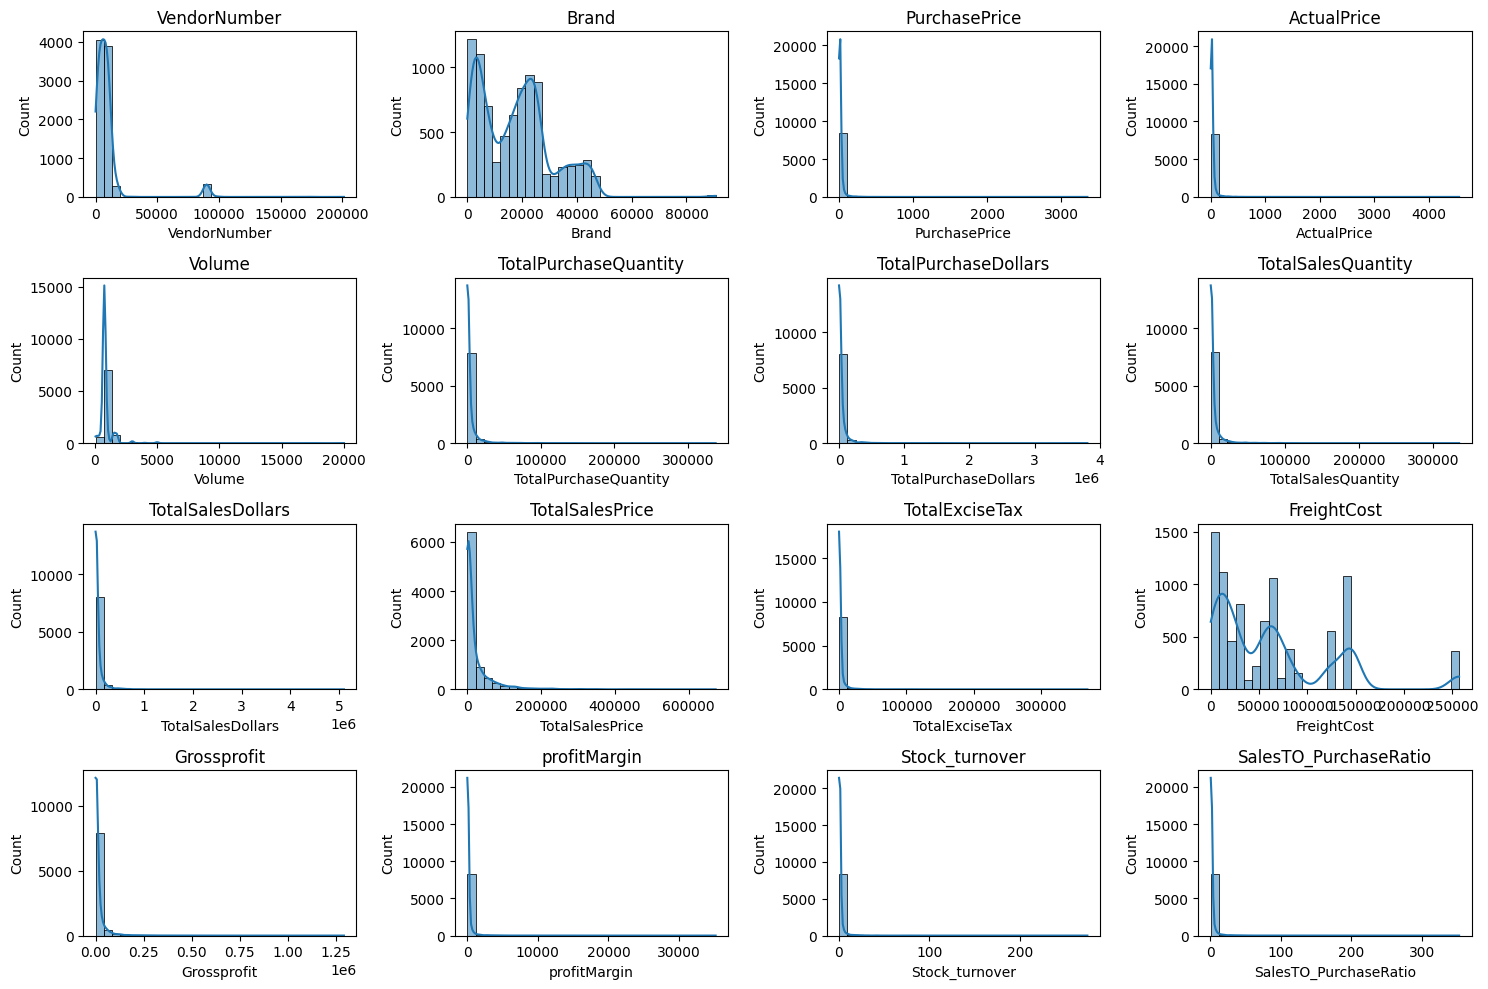

In [20]:
#distributoion plots for numerical  columns
numerical_cols=df2.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df2[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

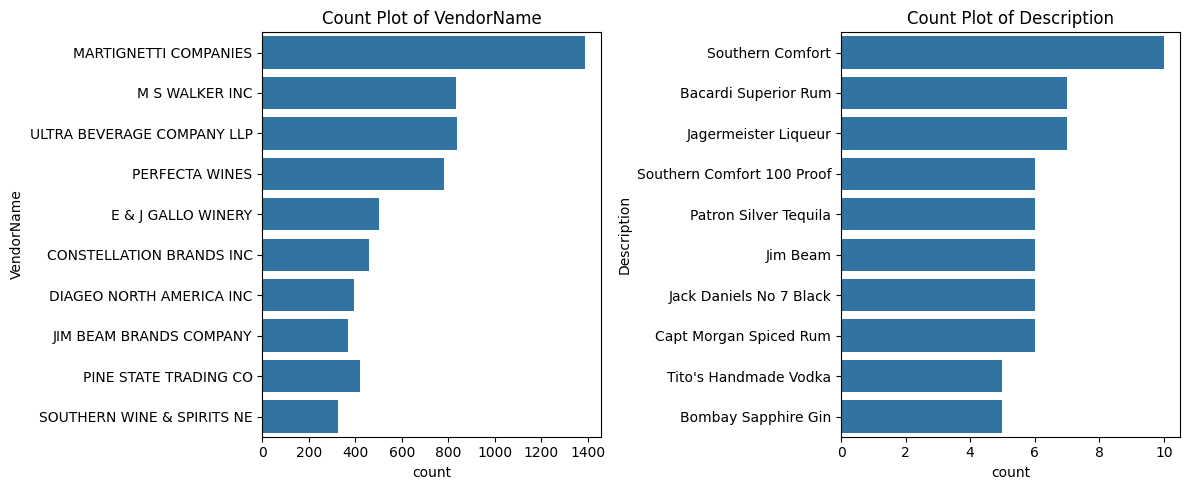

In [21]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(
        y=df[col],
        order=df2[col].value_counts().index[:10]  # Top 10 categories
    )
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()


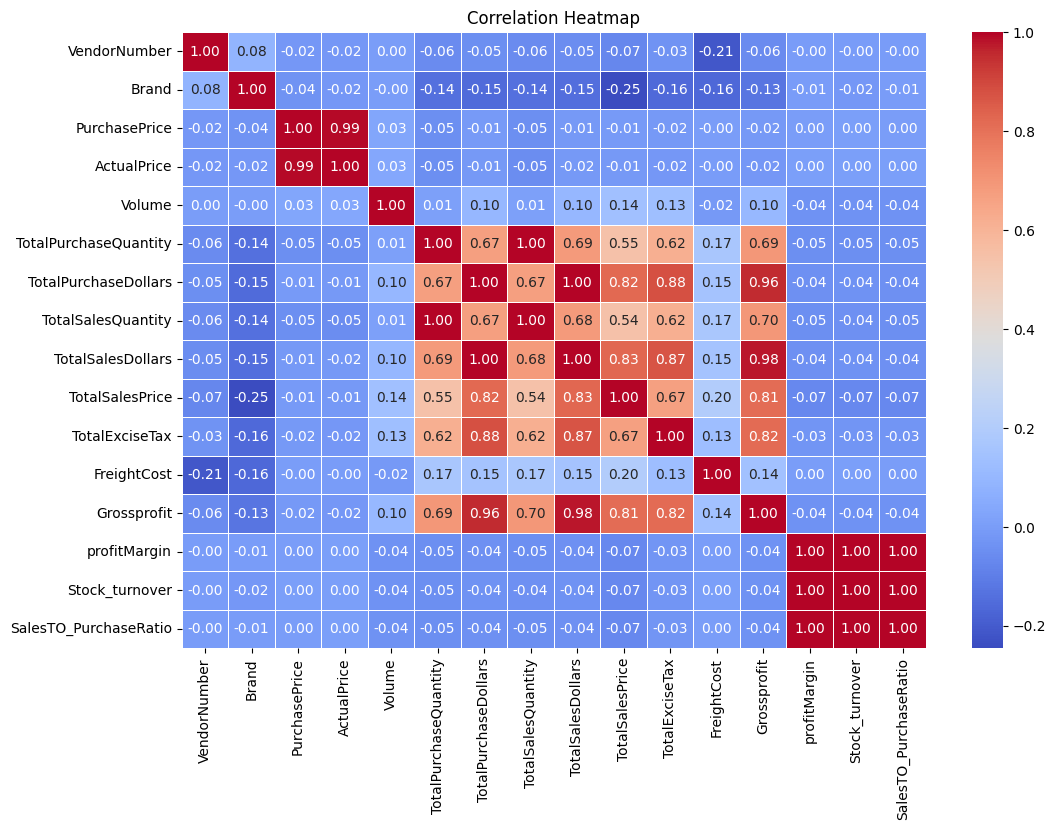

In [22]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))

correlation_matrix = df2[numerical_cols].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()




## **Correlation Insights**

* **PurchasePrice** has weak correlations with **TotalSalesDollars** (-0.012) and **GrossProfit** (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

* There is a **strong correlation** between **TotalPurchaseQuantity** and **TotalSalesQuantity** (0.999), confirming efficient inventory turnover.

* A **negative correlation** between **ProfitMargin** and **TotalSalesPrice** (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

* **StockTurnover** has weak negative correlations with both **GrossProfit** (-0.038) and **ProfitMargin** (-0.055), indicating that faster turnover does not necessarily result in higher profitability.


#



## **Data Analysis**

Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.


In [23]:
df2.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'Grossprofit',
       'profitMargin', 'Stock_turnover', 'SalesTO_PurchaseRatio'],
      dtype='object')

In [27]:
brand_performance=df2.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'SalesTO_PurchaseRatio':'mean'
}).reset_index()

In [ ]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['SalesTO_PurchaseRatio'].quantile(0.85)


In [42]:
low_sales_threshold

560.299

In [43]:
high_margin_threshold

2.9393204614039337

In [32]:
target_brands=brand_performance[(brand_performance['TotalSalesDollars']<=low_sales_threshold) &
(brand_performance['SalesTO_PurchaseRatio']>=high_margin_threshold)]
print("brands with low sales but high profit margine")
display(target_brands.sort_values('TotalSalesDollars'))

brands with low sales but high profit margine


,Description,TotalSalesDollars,SalesTO_PurchaseRatio
6199,Santa Rita Organic Svgn Bl,9.99,2.982090
2070,Concannon Glen Ellen Wh Zin,15.95,6.041667
2188,Crown Royal Apple,27.86,9.809859
6237,Sauza Sprklg Wild Berry Marg,27.96,5.603206
4828,Merry Irish Cream Liqueur,35.97,3.778361
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,4.300578
2271,Dad's Hat Rye Whiskey,538.89,5.510123
57,A Bichot Clos Marechaudes,539.94,3.099897
6245,Sbragia Home Ranch Merlot,549.75,2.980159


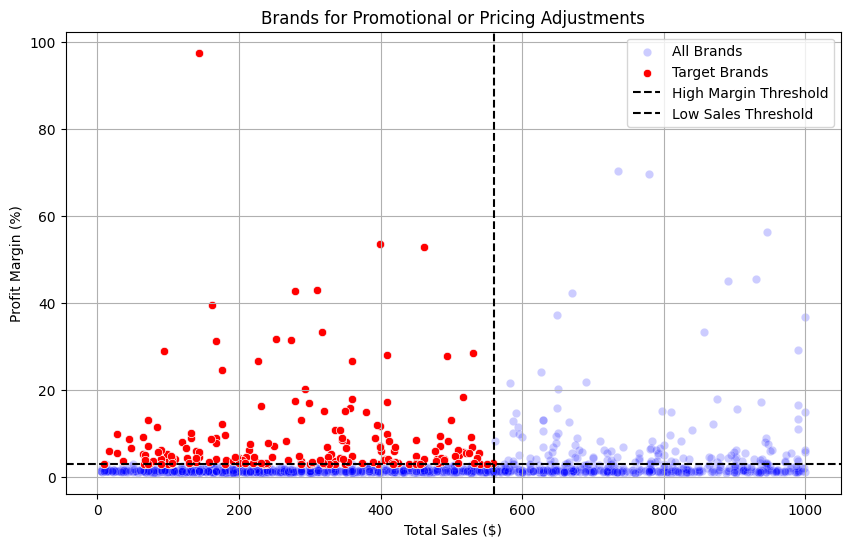

In [41]:
brand_performance = brand_performance[
    brand_performance['TotalSalesDollars'] < 1000
]  # for better visualization

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='SalesTO_PurchaseRatio',
    color="blue",
    label="All Brands",
    alpha=0.2
)

sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='SalesTO_PurchaseRatio',
    color="red",
    label="Target Brands"
)

plt.axhline(
    high_margin_threshold,
    linestyle='--',
    color='black',
    label="High Margin Threshold"
)

plt.axvline(
    low_sales_threshold,
    linestyle='--',
    color='black',
    label="Low Sales Threshold"
)

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


#

## **second business question**


**Which vendors and brands demonstrate the highest sales performance?**


In [45]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)


# Top Vendors & Brands by Sales Performance



In [46]:
top_vendors = (
    df.groupby("VendorName")["TotalSalesDollars"]
      .sum()
      .nlargest(10)
)

In [50]:
top_vendors.apply(lambda x :format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      68.74M
MARTIGNETTI COMPANIES         40.96M
PERNOD RICARD USA             32.28M
JIM BEAM BRANDS COMPANY       31.90M
BACARDI USA INC               25.01M
CONSTELLATION BRANDS INC      24.47M
E & J GALLO WINERY            18.55M
BROWN-FORMAN CORP             18.48M
ULTRA BEVERAGE COMPANY LLP    17.80M
M S WALKER INC                15.44M
Name: TotalSalesDollars, dtype: object

In [48]:
top_brands = (
    df.groupby("Description")["TotalSalesDollars"]
      .sum()
      .nlargest(10)
)


In [51]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

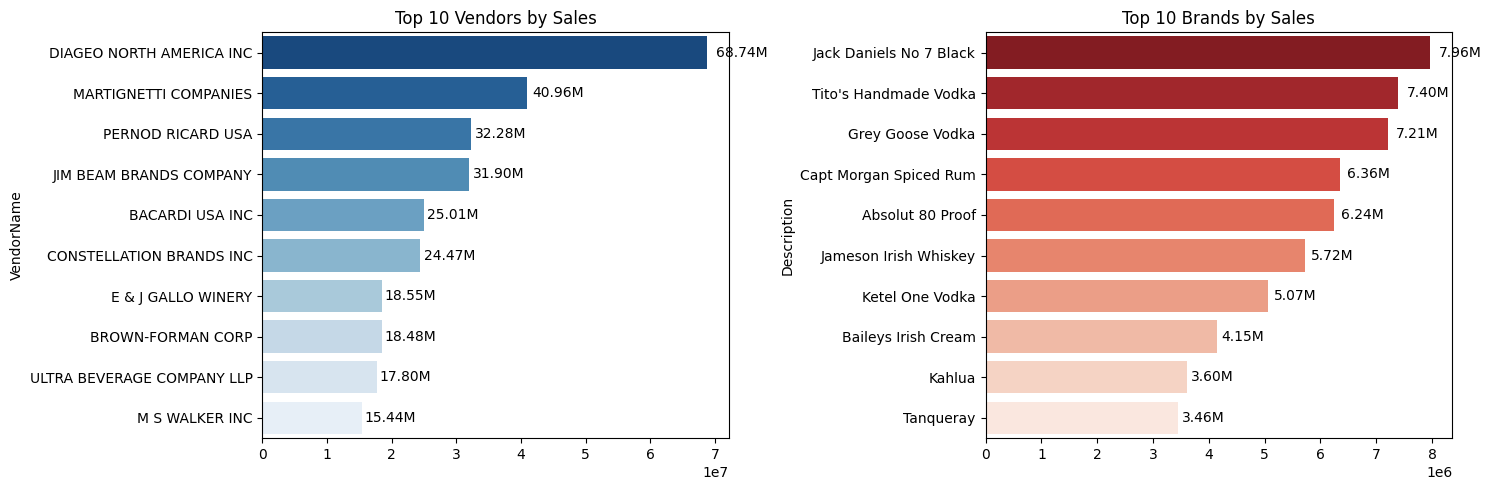

In [52]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    y=top_vendors.index,
    x=top_vendors.values,
    palette="Blues_r"
)
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    y=top_brands.index.astype(str),
    x=top_brands.values,
    palette="Reds_r"
)
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()
